# Курс "Компонентные модели"

## Автор: Харюк Павел, аспирант факультета ВМК МГУ имени М.В. Ломоносова
### Составлено: 2017-2018 гг.

# Занятие 5. Матричные разложения

## Неотрицательное разложение (Non-negative matrix factorization, NMF)

### Модели с условием неотрицательности

Предположение о неотрицательности данных часто используется на практике и связано со следующими задачами:

* обработка изображений, видеоряда
* обработка медицинских изображений (ПЭТ, КТ, МРТ и др)
* работа с вероятностями
* обработка данных, которые имеют физическую интерпретацию (объём, цена, и т.д.)

За физическую интерпретацию часто приходится платить худшей статистической достоверностью (например, объяснима меньша доля дисперсии данных).

Наиболее распространённый вариант неотрицательного разложения предполагает неотрицательность обеих фактор-матриц:

$$
\begin{array}{rc}
& X \approx W H^T \\ 
{s.t.} & W, H \geq 0 \\
\end{array}$$

Мы будем называть его ***стандартным неотрицательным разложением***. Однако, возможны вариации в виде строгой положительности одной или обеих фактор-матриц, неотрицательность одной из них и т.д. Некоторые из них будут приведены далее.

* **Симметричное NMF**: $X = W W^T$

Модель связана со спектральной кластеризацией и kernel K-means.

* **Полуортогональное (semiorthogonal) NMF:**

Условия $W^T W = I$ и/или $H^T H = I$ в дополнение к неотрицательности. Можно вычислять с помощью дополнительного преобразования на каждой итерации: $Y \leftarrow Y(Y^T Y)^{-1/2}$

* **Полунеотрицательное разложение**

Если исходная матрица содержит как положительные, так и отрицательные элементы, то можно потребовать неотрицательности только от одной фактор-матрицы.

* **Афинное NMF**

В данном случае в модели присутствует сдвиг столбцов исходной матрицы на некоторый вектор-столбец $a_0 \in \mathbb{R}_+^{m \times 1}$:

$$X \approx W H^T + a_0 \fbox{1}_{1 \times n}$$

* **Многослойное NMF**

$$X \approx W_1 W_2 \ldots W_P H^T$$

Используется для улучшения работы стандартных алгоритмов и избегания локальных минимумов. В (...) предложено последовательно вычислять стандартное неотрицательное разложение с двумя фактор-матрицами, и на каждом этапе продолжать разложение для правой фактор-матрицы. 

* **Одновременный NMF**

Одновременное разложение нескольких матриц с одним общим фактором:

$$X_i \approx W_i H^T$$

* **Свёрточный NMF**

Свёрточное расширение стандартной модели с условием неотрицательности для всех $A_p$ и $H$:

$$X \approx \sum\limits_{p=-(P-1)}^{P-1} W_p \overset{p \to}{Shift}[H]$$

В данном случае оператор $ \overset{p \to}{Shift}[H]$ сдвигает столбцы матрицы $H$ на $p$ позиций вправо. Можно рассматривать аналогичную модель, но со сдвигом строк. При этом следует выбрать тип сдвига (заполнение нулями, циклический сдвиг, повторение последнего столбца и т.д.).

* **Проективный NMF**

Симметричная форма:
$$X \approx W W^T X$$

Общая (несимметричная) форма:
$$X \approx WH^T X$$


* **Kernel NMF**
По существу, это обобщение проективного NMF. Пусть имеется преобразование, зависящее от столбцов матрицы: $\phi(X)$. Тогда можно поставить проективную задачу для результата преобразованния:

$$\phi(X) \approx W H^T \phi(X)$$

Названо так по той причине, что минимизация Фробениусовой нормы исходных данных и приближения зависит от $K(X) = \phi(X)^T \phi(X)$. В случае линейного ядра $K(X) = X^T X$ задача носит название *выпуклого NMF*:
$$X^T \approx X^T H W^T,$$
$X^T H$ - афинная (выпуклая) комбинация строк матрицы $X$.

* **Трёхфакторное NMF**
В трёхфакторной модели возникает третья матрица; условие неотрицательности применяется ко всем трём, либо к некоторым из них:

$$X \approx WSH^T$$

Модель не имеет смысла без дополнительных условий на фактор-матрицы.

### О единственности неотрицательного матричного разложения

Стандартное неотрицательное матричное разложение не обладает свойством единственности:

$$X \approx W H^T = (W B) (B^{-1} H^T) = \widehat{W} \widehat{H}^T,$$

причём $B$ не обязательно является произведением матриц перестановки и ${diag}(d)$, $d_i > 0$.

Единственность решения (с точностью до растяжений и перестановок) могут обеспечить следующие операции (главным образом, для устойчивости к вращению):

1. Нормализация / фильтрация / центрирование входных данных; 

2. Нормализация столбцов левой фактор-матрицы к единичной $l_1$-норме;

3. Дополнительные предположения о фактор-матрицах (разреженность, гладкость).



### Вычисление стандартного неотрицательного разложения

### Задача наименьших квадратов

Соответсвующая оптимизационная задача наименьших квадратов имеет вид:

$$\frac{1}{2}\|W H^T - X\|_F^2 \to \min$$

Простейший способ приближённого вычисления факторов - ALS метод с проектированием (Paatero & Tapper 1994). На каждом шаге выполняются следующие операции:

$$W_{new}: \quad W_{new} H^T H = X H$$
$$W \leftarrow P_{\geq 0} [W_{new}]$$
$$H_{new}: \quad W^T W H_{new}^T = W^T X$$
$$H \leftarrow P_{\geq 0} [H_{new}]$$

К недостаткам метода относится отсутствие гарантированной сходимости к локальному минимуму. 

Следующий метод предложен (Lee and Seung 2000) на основе мультипликативных обновлений.

$$W \leftarrow W \circledast (XH) \oslash (W H^T H + \varepsilon)$$
$$H \leftarrow H \circledast (X^T W) \oslash (H W^T W + \varepsilon)$$

Доказана сходимоть к локальному минимуму (на основе EM-рассуждений); на практикие за 50-100 итераций.

Для построения разложения в случае больших данных может быть применён следующий метод редукции. Выбирается некоторые подмножество строк $X_r$ и подмножество столбцов $X_c$ матрицы $X$. Рассматриваются подзадачи с условием неотрицательности факторов:
$$\frac{1}{2}\|W_r H^T - X_r\|_F^2, \quad W_r \text{ фиксировано}$$
$$\frac{1}{2}\|W H_c^T - X_c\|_F^2, \quad H_c \text{ фиксировано}$$

Отсюда итеративно оцениваются $W$, $H$. Главный вопрос - выбор подмножеств. Это могут быть равномерный случайный выбор, выбор с заданной вероятностью (проворциональной норме строк или столбцов), выбор на основе некоторого иного критерия (например, CUR разложение).

### Минимизация I-дивергенции

I-дивергенция - обобщение расстояния Кульбака-Лейблера:

$$
\begin{array}{rc}
& \sum\limits_{i,j} \big( X_{ij} \ln \frac{X_{ij}}{[W H^T]_{ij}} - X_{ij} + [WH^T]_{ij} \big) \to \min \\
{s.t.} & W, H \geq 0 \\
\end{array}$$

Часто вместе с неотрицательностью рассматривают условие разреженности

Ниже представлена реализация неотрицательного матричного разложения через минимизацию I-дивергенции и с помощью решения задачи нелинейных наименьшых квадратов методом проективного ALS.

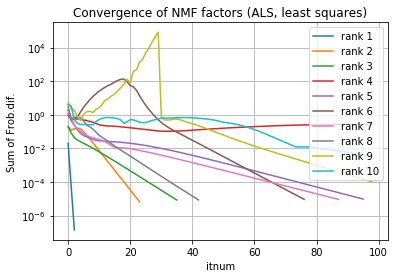

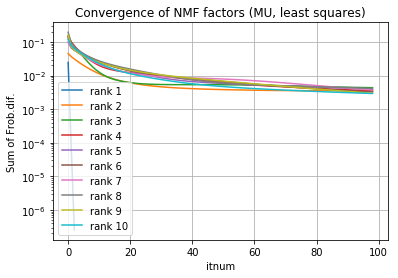

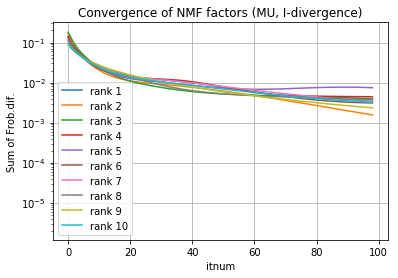

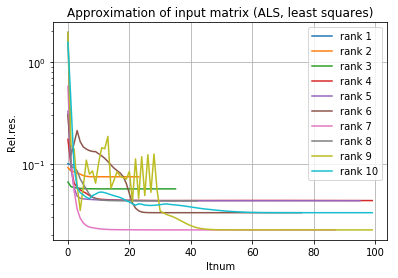

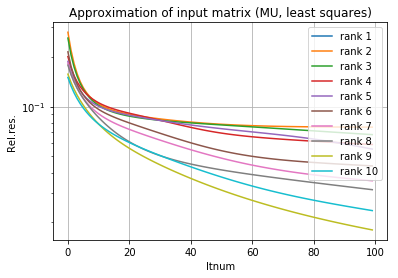

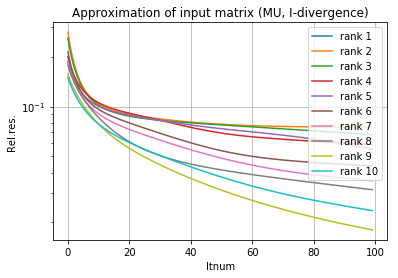

In [121]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def nmf_als(X, r=1, tol=1e-5, maxitnum=100):
    [m, n] = X.shape
    Xnorm = np.linalg.norm(X)
    X /= Xnorm
    H = np.abs(np.random.randn(n, r))
    H /= np.linalg.norm(H)
    stats = {}
    stats['conv'] = []
    stats['appr'] = []
    for i in xrange(maxitnum):
        Wnew = np.dot(X, H)
        Wnew = np.dot(Wnew, np.linalg.pinv(np.dot(H.T, H)))
        Wnew = np.maximum(Wnew, 0)
    
        Hnew = np.dot(X.T, Wnew)
        Hnew = np.dot(Hnew, np.linalg.pinv(np.dot(Wnew.T, Wnew)))
        Hnew = np.maximum(Hnew, 0)
        
        if i > 0:
            dif = np.linalg.norm(Hnew - H) + np.linalg.norm(Wnew - W)
            stats['conv'].append(dif)
            if dif < tol:
                break
        H = Hnew.copy()
        W = Wnew.copy()
        stats['appr'].append(np.linalg.norm(np.dot(W, H.T) - X))
    X *= Xnorm
    return W, H, stats

def nmf_muls(X, r=1, tol=1e-5, maxitnum=100, func='F'):
    funcs = ['F', 'div']
    assert func in funcs, "Incorrect *func* name"
    [m, n] = X.shape
    Xnorm = np.linalg.norm(X)
    X /= Xnorm
    W = np.abs(np.random.randn(m, r))
    W /= np.linalg.norm(W)
    H = np.abs(np.random.randn(n, r))
    H /= np.linalg.norm(H)
    stats = {}
    stats['conv'] = []
    stats['appr'] = []
    eps = 1e-9
    for i in xrange(maxitnum):
        if func == 'F':
            Wnew = W * np.dot(X, H)
            Wnew /= np.dot(W, np.dot(H.T, H)) + eps

            Hnew = H * np.dot(X.T, Wnew)
            Hnew /= np.dot(H, np.dot(Wnew.T, Wnew)) + eps
        elif func == 'div':
            Wnew = W * np.dot(X / (np.dot(W, H.T) + eps), H)
            tmp = np.sum(H, axis=0, keepdims=True)
            Wnew /= tmp

            Hnew = H * np.dot(Wnew.T, X / (np.dot(Wnew, H.T) + eps)).T
            tmp = np.sum(Wnew, axis=0, keepdims=True)
            Hnew /= tmp
        
        if i > 0:
            dif = np.linalg.norm(Hnew - H) + np.linalg.norm(Wnew - W)
            stats['conv'].append(dif)
            if dif < tol:
                break
        H = Hnew.copy()
        W = Wnew.copy()
        stats['appr'].append(np.linalg.norm(np.dot(W, H.T) - X))
    X *= Xnorm
    return W, H, stats

m = 15
n = 10
r = 7
Winit = np.random.uniform(0, 1, size=(m, r))
Hinit = np.random.uniform(0, 1, size=(n, r))
X = np.dot(Winit, Hinit.T)

convs_als = []
convs_muls = []
convs_div = []
apprs_als = []
apprs_muls = []
apprs_div = []
maxR = r+3
for R in xrange(maxR):
    W, H, stats = nmf_als(X, r=R+1, tol=1e-5, maxitnum=100)
    convs_als.append(stats['conv'])
    apprs_als.append(stats['appr'])
    W, H, stats = nmf_muls(X, r=R+1, tol=1e-5, maxitnum=100)
    convs_muls.append(stats['conv'])
    apprs_muls.append(stats['appr'])
    W, H, stats = nmf_muls(X, r=R+1, tol=1e-5, maxitnum=100, func='div')
    convs_div.append(stats['conv'])
    apprs_div.append(stats['appr'])

plt.clf()
for R in xrange(maxR):
    plt.semilogy(convs_als[R], label='rank '+str(R+1))
plt.title('Convergence of NMF factors (ALS, least squares)')
plt.xlabel('itnum')
plt.ylabel('Sum of Frob.dif.')
plt.legend()
plt.grid(True)
plt.show()
for R in xrange(maxR):
    plt.semilogy(convs_muls[R], label='rank '+str(R+1))
plt.title('Convergence of NMF factors (MU, least squares)')
plt.xlabel('itnum')
plt.ylabel('Sum of Frob.dif.')
plt.legend()
plt.grid(True)
plt.show()
for R in xrange(maxR):
    plt.semilogy(convs_div[R], label='rank '+str(R+1))
plt.title('Convergence of NMF factors (MU, I-divergence)')
plt.xlabel('itnum')
plt.ylabel('Sum of Frob.dif.')
plt.legend()
plt.grid(True)
plt.show()
for R in xrange(maxR):
    plt.semilogy(apprs_als[R], label='rank '+str(R+1))
plt.title('Approximation of input matrix (ALS, least squares)')
plt.xlabel('Itnum')
plt.ylabel('Rel.res.')
plt.legend()
plt.grid(True)
plt.show()
for R in xrange(maxR):
    plt.semilogy(apprs_div[R], label='rank '+str(R+1))
plt.title('Approximation of input matrix (MU, least squares)')
plt.xlabel('Itnum')
plt.ylabel('Rel.res.')
plt.legend()
plt.grid(True)
plt.show()
for R in xrange(maxR):
    plt.semilogy(apprs_div[R], label='rank '+str(R+1))
plt.title('Approximation of input matrix (MU, I-divergence)')
plt.xlabel('Itnum')
plt.ylabel('Rel.res.')
plt.legend()
plt.grid(True)
plt.show()



Классические проблемы ALS метода:

1. проблемы со сходимостью (нестабилен)
2. субоптимальность решения
3. чувствительность к шуму
4. медленная сходимость для почти коллинеарных данных

## Метод главных компонент (PCA)

Столбцы матрицы можно рассматривать как случайные векторы, в строках которых находятся их случайные реализации. Метод главных компонент нацелен на диагонализацию их ковариационной матрицы: в случае, если все векторы принадлежат распределению Гаусса, то это условие эквивалентно их статистической независимости.

$$X = S A^T, \\
s.t. \, S^T S = \text{diag} (\sigma_1^2, \ldots, \sigma_r^2)$$

Для вычисления такого разложения используется сингулярное разложение матрицы:

$$X = U \Sigma V^T, \quad U^T U = I, \, V^T V = I, \, \Sigma = \text{diag} (\sigma_1, \ldots, \sigma_r)$$
$$S = U \Sigma, \quad A = V$$

Метод также подходит для поиска пространства меньшей размерности, разброс данных в проекции на которое максимален. Это следует из теоремы о наилучшей малоранговой аппроксимации матрицы в Фробениусовой норме:
$$A_r = \arg\min\limits_{B | rank(B) \leq r} \|A - B\|^2_F$$

где $A_r$ получается из сингулярного разложения матрицы $A$ путём зануления всех сингулярных чисел, лежащих далее $r$-ых строки и столбца. В ряде работ распространён метод визуализации данных с помощью первых 2-3 компонент, на которые проектируются исходные данные и отрисовываются в этих осях в виде облака точек.
Также метод используют для сжатия данных.

## Неотрицательное матричное разложение с помощью PCA

С помощью PCA можно построить алгоритм поиска неотрицательного матричного разложения для матрицы с неотрицательными элементами. Для такой матрицы можно показать, что её ведущие сингулярные векторы, отвечающие наибольшему сингулярному числу, неотрицательны. Опираясь на это свойство, строится следующая процедура:

$$Y_{j} = \max\Big(0, \, Y_{j-1} - \sigma_{1, (j)} u_{1, (j)} v_{1, (j)}^T \Big), \quad
Y_0 = A, \quad  Y_{j-1} = \sum\limits_{i} \sigma_{i, (j)} u_{i, (j)} v_{i, (j)}^T $$

Ниже представлена реализация алгоритма. Обратите внимание, что алгоритм работает значительно хуже для матриц с большим разбросом элементов (измените условия эксперимента самостоятельно, чтобы в этом убедиться).

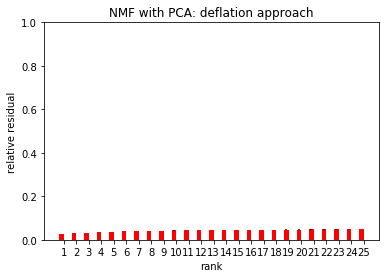

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def nn_pca(X, R=1, tol=1e-9, verbose=False):
    Y = np.maximum(X, 0.)
    normY0 = np.linalg.norm(Y)
    W = []
    H = []
    S = []
    if R is None:
        R = max(Y.shape)
    for r in xrange(R):
        if np.linalg.norm(Y) <= tol*normY0:
            if verbose:
                print 'rank %d: overestimated. Ended with %d' % (R, r+1)
            break
        u, s, vt = np.linalg.svd(Y, full_matrices=False)
        W.append(u[:, 0])
        H.append(vt[0, :].T)
        S.append(s[0])
        Y -= s[0]*np.dot(u[:, :1], vt[:1, :])
        Y = np.maximum(Y, 0.)
    W = np.array(W).T
    H = np.array(H).T
    S = np.array(S)
    return W, H, S

m = 50
n = 40
rmax = 25
Nt = 100
relres = np.zeros([rmax, Nt])
for k in xrange(Nt):
    X = np.random.uniform(0.1, 0.11, size=[m, n])
    X = np.maximum(X, 0.)
    normX = np.linalg.norm(X)
    for r in xrange(rmax):
        W, H, S = nn_pca(X, r+1, verbose=True)
        r1 = W.shape[1]
        #if r1 == (r+1):
        relres[r, k] = np.linalg.norm(np.dot(W*S, H.T) - X) / normX

means = np.mean(relres, axis=1)
stds = np.std(relres, axis=1, ddof=1)
#means = np.median(relres, axis=1)
xloc = np.arange(rmax)
width = 0.35

plt.clf()
fig, ax = plt.subplots()
ax.bar(xloc, means, width, color='r', yerr=stds)
#ax.bar(xloc, means, width, color='r')
ax.set_xticks(xloc + width / 2)
ax.set_xticklabels(map(str, xloc+1))
ax.set_title('NMF with PCA: deflation approach')
ax.set_xlabel('rank')
ax.set_ylabel('relative residual')
ax.set_ylim([0., 1.])

plt.show()


## Метод независимых компонент (ICA)

С задачей матричной факторизации связана проблема слепого разделения сигналов, в которой исходные данные моделируются в виде линейной смеси некоторых источников. Одно из важнейших условий, используемых на практике, - условие статистической независимости этих источников. Выше был рассмотрен метод главных компонент, в котором источники моделировались как случайные векторы из Гауссовского распределения. Однако в случае, если случайные величины не являются гауссовыми, то условие диагональности их ковариационной матрицы не эквивалентно их статистической независимости. Ниже приведён пример попыток восстановить распределение оригинальных источников (зелёный цвет) по их линейным смесям с заданной матрицей смешивания (синий цвет) и результат восстановления с помощью метода главных компонент (красный цвет). По строкам идут следующие распределения: Лапласа, равномерное и Гауссово.

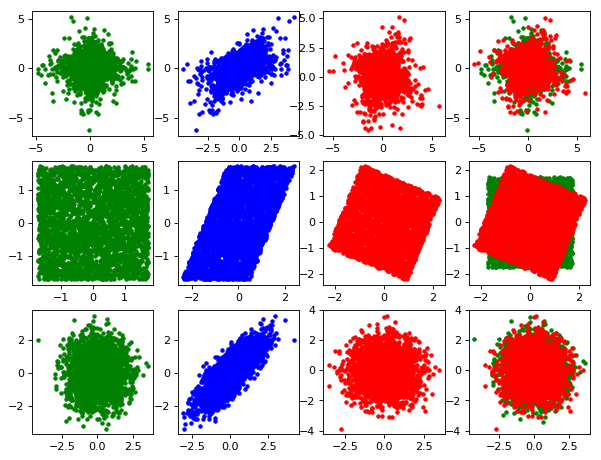

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg

loc = 0.   # $\mu$ - position of peak
scale = 1. # $\lambda$ - exponentional decay
size = 3000

S = np.empty((6, size))
Y = S.copy()
S[0] = np.random.laplace(loc, scale*0.001, size)
S[1] = np.random.laplace(loc, scale*0.001, size)
S[2] = np.random.uniform(loc-1., scale, size)
S[3] = np.random.uniform(loc-1., scale, size)
S[4] = np.random.normal(loc, scale*0.5, size)
S[5] = np.random.normal(loc, scale, size)

plt.clf()
f, ax = plt.subplots(3, 4, sharey=False, figsize=(9, 7), dpi=80, facecolor='w', edgecolor='k')

A = np.array([[-1.5, 1], [0, 2]])  # Mixing matrix
for i in xrange(3):
    Y[i*2:(i+1)*2] = np.dot(A, S[i*2:(i+1)*2]) # observations
    ax[i, 0].plot(S[i*2] / np.std(S[i*2], ddof=1), S[i*2+1] / np.std(S[i*2+1], ddof=1), 'g.')
    ax[i, 3].plot(S[i*2] / np.std(S[i*2], ddof=1), S[i*2+1] / np.std(S[i*2+1], ddof=1), 'g.')


for i in xrange(3):
    ax[i, 1].plot(Y[i*2] / np.std(Y[i*2], ddof=1), Y[i*2+1] / np.std(Y[i*2+1], ddof=1), 'b.')

for i in xrange(Y.shape[0]):
    Y[i, :] -= Y[i].mean()

for i in xrange(3):
    U, S, V = linalg.svd(Y[i*2:(i+1)*2])
    Z = np.dot(U.T, Y[i*2:(i+1)*2])
    ax[i, 2].plot(Z[0] / np.std(Z[0]), Z[1] / np.std(Z[1], ddof=1), 'r.')
    ax[i, 3].plot(Z[0] / np.std(Z[0]), Z[1] / np.std(Z[1], ddof=1), 'r.')

Для удобства в этой части текста поменяем ролями строки и столбцы. Представим, что мы имеем $m$ наблюдаемых величин, каждая измерена $T$ раз.

$$x_j(t), \, j = \overline{1, m}, \, t = 1, \ldots, T$$

Интерес представляет возможность получения таких $y_i(t)$, которых $n$ штук, $n < m$, при этм они линейно выражаются из исходных наблюдаемых данных.

$$y_i(t) = \sum\limits_{j=1}^{n} a_{ij} x_j(t), \, i = \overline{1, n}$$

$$\begin{bmatrix}
   y_1(t) \\
   y_2(t) \\
   \ldots \\
   y_n(t) \\
\end{bmatrix}
= A
\begin{bmatrix}
   x_1(t) \\
   x_2(t) \\
   \ldots \\
   x_m(t) \\
\end{bmatrix}$$

$$ \bar{y}(t) = A \bar{x}(t) $$

С точки зрения математической статистики $\bar{x} = \bar{x}(t)$ представляет собой набор $T$ реализаций $m$ случайных величин.
$\bar{y}$ должны быть независимы в статистическом смысле. Это значит, что их совместная плотность вероятности факторизуется в произведение отдельных плотностей:

$$p_{y_1, \ldots, y_n}(y_1, \ldots, y_n) = \prod\limits_{i=1}^{n} p_{y_i}(y_i)$$

Из свойства статистической независимости сразу вытекает полезное следствие, сформулируем его для $n=2$.

$\textbf{Утверждение.} \quad$ Пусть $g(z), \, h(z)$ - абсолютно интегрируемые функции одной переменной. Тогда, для двух статистически независимых случайных величин $y_1$, $y_2$, имеющих непрерывное распределение, справедливо

$$ E(g(y_1) h(y_2)) = E(g(y_1)) E(h(y_2)), $$

$Ex = E(x) = \int\limits_{- \infty}^{+ \infty} x p_x(x) dx$ - математическое ожидание.


Варианты аппроксимации статистической независимости:

**1) Декорелляция компонент и их нелинейных преобразований.**

Результаты нелинейного преобразования двух статистически независимых сл.величин некореллированы (а кореллированых - в общем случае, нет).

Задача сводится к поиску такой матрицы W, что нелинейно преобразованные компоненты некореллированы. Проблема - выбор нелинейности.

Теория статистического оценивания: принцип максимального правдоподобия

Теория информации: прямые меры (взаимная информация, ...)

**2) Максимизация негауссовости**

ЦПТ: распределение суммы случайных величин стремится к нормальному

На практике используются меры негауссовости на основе кумулянтов (kurtosis, ...).

Один из алгоритмов - Fast ICA. Ниже представлено разделение негауссовских сигналов с его помощью. Важно поманить, что компоненты определяются с точностью до знака и перестановки.

В методе используется минимизация негативной энтропии (негэнтропии). Стандартная энтропия определяется выражениями
$$H(Y) = - \sum\limits_i P(Y = a_i) \log(P(Y = a_i)) \quad \text{(дискретная сл. величина)},\\
H(y) = - \int p(y) \log( p(y) ) \quad (непрерывная сл. величина)$$

Энтропия достигает максимума для переменной, имеющей гауссово распределение (среди всех случайных величин с одинаковой дисперсией). Таким образом, на её основе была построена мера негауссовости, негэнтропия:
$$J_{\text{neg}} = H(y_{\text{gauss}}) - H(y), \quad \text{cov}(y_{\text{gauss}}) = \text{cov}(y)$$

На практике используются различные аппроксимации негэнтропии. В частности, следующего вида:

$$J_{\text{neg}}(y) \propto \big( \textbf{E} [G(y)] - \textbf{E} [G(y_{\text{normal}})] \big)^2$$

($\propto$ - пропорционально). $G(u)$ - некоторая неквадратичная нелинейность; наиболее робастными для этой задачи являются

$$G_1(u) = \frac{1}{c_1} \log \cosh(c_1 u), \, c_1\in[1, 2],  \quad G_2(u) = -\exp(-u^2/2)$$

## Fast ICA

Рассмотрим идеи алгоритма Fast ICA.

### Предобработка

В качестве предобработки используется центрирование данных (вычитание среднего) и т.н. "отбеливание" (whitening): такое линейное преобразование данных $\widehat{Y} = L Y$, чтобы $\textbf{E}[\widehat{Y} \widehat{Y}^T] = I$.

Легко построить такое преобразование с помощью сингулярного разложения: $Y = U \Sigma V^T$, $Y Y^T = U \Sigma^2 U^T$, откуда $L = U \Sigma^{-1} U^T$, и .

Такая предобработка позволяет получиь ортогональность матрицы смешивания: $I = \textbf{E}[\widehat{Y}\widehat{Y}^T] = A \textbf{E}[XX^T] A^T = A A^T$.

### Алгоритм

Fast ICA близок к задаче поиска наилучшей проекции, в которой ищется такое подпространство, в котором исходные данные имеют наиболее информативный вид. Наименее информативным считается гауссово распределение, поэтому техники поиска наилучшей проекции (projection pursuit) близки к задаче поиска независимых компонент.

Базовая версия алгоритма ищет компоненты последовательно, и на каждом шаге $w^T x$ максимизирует негауссовость ($w$ - строка матрицы размешивания), в роли целевой функции используется приближение негэнтропии.

В случае оценки нескольких компонент производится декоррелирование строк матрицы размешивания, чтобы пресечь сходимость к одинаковому максимуму.

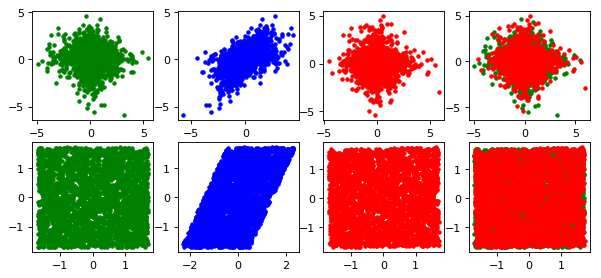

In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as linalg
from sklearn.decomposition import FastICA

loc = 0.   # $\mu$ - position of peak
scale = 1. # $\lambda$ - exponentional decay
size = 3000

S = np.empty((6, size))
Y = S.copy()
S[0] = np.random.laplace(loc, scale*0.001, size)
S[1] = np.random.laplace(loc, scale*0.001, size)
S[2] = np.random.uniform(loc-1., scale, size)
S[3] = np.random.uniform(loc-1., scale, size)

plt.clf()
f, ax = plt.subplots(2, 4, sharey=False, figsize=(9, 4), dpi=80, facecolor='w', edgecolor='k')

A = np.array([[-1.5, 1], [0, 2]])  # Mixing matrix
for i in xrange(2):
    Y[i*2:(i+1)*2] = np.dot(A, S[i*2:(i+1)*2]) # observations
    ax[i, 0].plot(S[i*2] / np.std(S[i*2], ddof=1), S[i*2+1] / np.std(S[i*2+1], ddof=1), 'g.')
    ax[i, 3].plot(S[i*2] / np.std(S[i*2], ddof=1), S[i*2+1] / np.std(S[i*2+1], ddof=1), 'g.')


for i in xrange(2):
    ax[i, 1].plot(Y[i*2] / np.std(Y[i*2], ddof=1), Y[i*2+1] / np.std(Y[i*2+1], ddof=1), 'b.')

for i in xrange(Y.shape[0]):
    Y[i, :] -= Y[i].mean()

cr = []
for i in xrange(2):
    ica = FastICA(n_components=2)
    Z = ica.fit_transform(X=Y[i*2:(i+1)*2].T).T
    ax[i, 2].plot(Z[0] / np.std(Z[0]), Z[1] / np.std(Z[1], ddof=1), 'r.')
    ax[i, 3].plot(Z[0] / np.std(Z[0]), Z[1] / np.std(Z[1], ddof=1), 'r.')

## Задания

1) Загрузите данные Yale Face dataset:
https://github.com/samehkhamis/FaceSDPAD/blob/master/yale.mat

Для чтения mat-файлов в python можно воспользоваться подходом, описанным здесь:
http://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries
Данные представляют собой фотографии 15 людей в 11 вариантах (3 варианта освещения, в очках и без, 6 выражений лиц). Выведите несколько различных изображений (функция matplotlib.pyplot.imshow). 
Для каждого целовека смешайте изображения случайной матрицей смешивания. Попробуйте восстановить исходные данные с помощью матричных разложений (NMF, PCA, ICA). Распечатайте результаты. Для выполнения задания екомендуется использовать пакет sklearn.

2) Для тех же данных, смешанных своими матрицами смешивания, сделайте предобработку в виде сжатия с помощью PCA. Отобразите зависимость качества малоранговой аппроксимации от числа компонент. Изменяются ли оценённые источники и если да, то каким обрзом?

## Дополнительные материалы

http://cis.legacy.ics.tkk.fi/aapo/ps/NN00.pdf

http://www.iiis.org/CDs2017/CD2017Spring/papers/ZA832BA.pdf

Cichocki et al. Non-negative matrix and tensor factorizations.



In [136]:
import numpy as np

def soft_shrink(X, alpha):
    # penalty: 2 alpha \|v\|_1
    assert alpha >= 0, 'alpha must be positive'
    return np.sign(X)*np.maximum(np.abs(X) - alpha, 0.)

def hard_shrink(X, alpha):
    # penalty: alpha^2 \|v\|_0
    assert alpha >= 0, 'alpha must be positive'
    Y = X.copy()
    Y[np.abs(Y) < alpha] = 0.
    return Y

def sparse_pca(X, R=None, alpha=0.3, shrinkage='soft', tol=1e-5, innertol=1e-5, maxinerit=300):
    # Shen, Huang [2]:[124]
    # sparsity constraint on V
    if R is None:
        R = max(X.shape)
    Y = X.copy()
    normX = np.linalg.norm(X)
    U = []
    S = []
    Vt = []
    for r in xrange(R):
        u, s, vt = np.linalg.svd(Y, full_matrices=False)
        u = u[:, :1]
        vt = vt[:1, :]
        s = s[0]
        for innerit in xrange(maxinerit):
            if shrinkage == 'soft':
                vt_new = soft_shrink(np.dot(u.T, Y), alpha)
            elif shrinkage == 'hard':
                vt_new = hard_shrink(np.dot(u.T, Y), alpha)
            u_new = np.dot(Y, vt.T)
            u_new /= np.linalg.norm(u_new)
            if np.linalg.norm(u_new - u) + np.linalg.norm(vt_new - vt) / np.linalg.norm(vt) < innertol:
                break
            vt = vt_new.copy()
            u = u_new.copy()
        vt /= np.linalg.norm(vt)
        U.append(u.flatten(order='F'))
        S.append(s)
        Vt.append(vt.flatten(order='F'))
        Y -= s*np.dot(u, vt)
        if np.linalg.norm(Y) < tol * normX:
            break
    U = np.array(U).T
    Vt = np.array(Vt)
    S = np.array(S)
    return U, S, Vt

eps = np.spacing(1.)
m = 50
n = 40
r = 35
X = np.random.uniform( size=[m, n])
normX = np.linalg.norm(X)
u, s, vt = sparse_pca(X, r, alpha=0.4, shrinkage='hard')
print "Rank: %d" % len(s)
print "nnz(V): %.5f" % (float(np.sum(np.abs(vt) > eps)) / vt.size)
print 'rel.res: %.5f' % (np.linalg.norm(np.dot(u*s, vt) - X) / normX)

Rank: 35
nnz(V): 0.23500
rel.res: 0.16317


Нарисуйте графически $\| x \|_0 \leq \text{const}$ и $\| x \|_1 \leq \text{const}$ в двумерном случае.
Какое из множеств выпукло? Как оно связано со вторым?

https://www.researchgate.net/publication/290729378_Why_l1_is_a_good_approximation_to_l0_A_geometric_explanation